In [1]:
#%%
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline


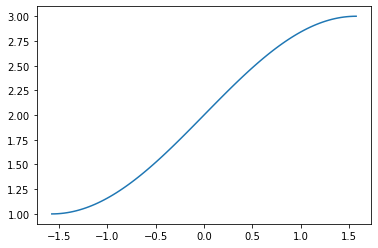

In [9]:
def f(x):
    return np.sin(x) + 2

x = np.linspace(-m.pi/2, m.pi/2, num=100)
y = f(x)
plt.plot(x, y)


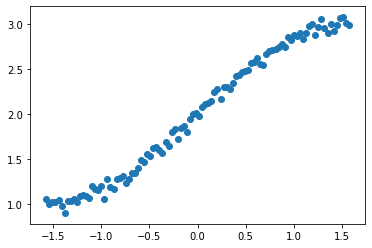

In [18]:
def make_regression(target_f, n_samples, noise, borders):
    x = np.linspace(borders[0], borders[1], num=n_samples)
    y = target_f(x) + np.random.normal(0, noise, size = n_samples)
    return (x, y)

dataset = make_regression(f, 100, 0.05, [-m.pi/2, m.pi/2])
plt.scatter(dataset[0], dataset[1])

In [29]:
def gradient(predictions, X, y):
    res = []
    for j in range(len(X[0])):
        res += [2 * sum((predictions[i] - y[i]) * X[i][j] for i in range(len(X))) / len(X)]
    return res

def gradient_descent(X, y, lr = 0.01, iterations = 1000):
    W = [0] * len(X[0])
    
    for _ in range(iterations):
        predictions = [sum(W[i] * X[j][i] for i in range(len(X[0]))) for j in range(len(X))]
        w_grad = gradient(predictions, X, y)
        W = [(W[i] - lr * w_grad[i]) for i in range(len(X[0]))]
    
    return W

In [36]:
X = dataset[0]
y = dataset[1]

X = np.array([[i] for i in X])
X = np.hstack((X, np.ones((X.shape[0], 1))))

W = gradient_descent(X, y)

[0.7729673549001829, 2.0035646334408654]


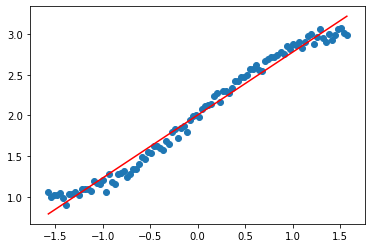

In [37]:
print(W)
y_pred = [sum(W[i] * X[j][i] for i in range(len(X[0]))) for j in range(len(X))]
plt.plot(dataset[0], y_pred, color='r')
plt.scatter(dataset[0], y)